In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../') # import modules from ../

In [2]:
import datahandling as dh
import graphing as gr
import numpy as np
import pandas as pd

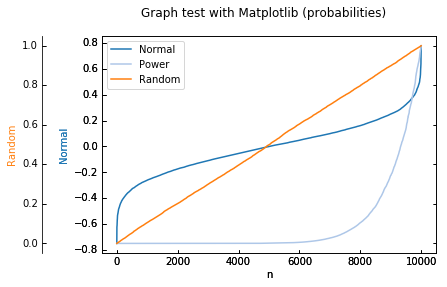

In [3]:
n = 10000

gr.multiaxis_graph(np.array(range(0, n)),
                [np.sort(np.random.normal(0, 0.2, size=n)),
                 np.sort(np.random.power(0.1, size=n)),
                 np.sort(np.random.random(size=n))],
                x_label="n",
                title="Graph test with Matplotlib (probabilities)",
                y_series=["Normal", "Power", "Random"],
                twin_x=True, legend=True)

In [4]:
from datetime import datetime, timedelta

def gen_test_data(nsensors=10):
    import random, string

    def get_test_id():
        sample = string.hexdigits[:10] + string.hexdigits[-6:]
        return "42" + "".join([random.choice(sample) for i in range(6)])

    def get_test_data(ndays=100):
        date_start = datetime.now() - pd.Timedelta(str(ndays) + ' days')

        df = pd.DataFrame({'date': [date_start + timedelta(hours=x) for x in range(ndays*24)], 
                           'test': pd.Series(np.random.randn(ndays*24))})
        return df.set_index('date')
    
    return { get_test_id(): get_test_data() for i in range(nsensors) }

In [5]:
dfs = gen_test_data(nsensors=10)

In [6]:
when = datetime.combine(datetime.now().date(), datetime.min.time())
gr.set_mpl_params()
svg = gr.weekly_graph(dfs, 'test', 'Test Data', when - pd.Timedelta('6 days'), when)

In [7]:
import IPython.core.display as ipd
import base64
ipd.HTML(base64.b64decode(svg).decode('utf8'))

In [8]:
from pandas.tseries.offsets import MonthEnd, MonthBegin

svg = gr.monthly_graph(dfs, 'test', 'Test Data', when, when+MonthEnd(), hspace=.1)

In [9]:
ipd.HTML(base64.b64decode(svg).decode('utf8'))

In [18]:
import webbrowser

webbrowser.open_new_tab("data:image/svg+xml;charset=UTF-8;base64," + svg)

True